## Import Libraries & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import shap
from scipy import stats

In [2]:
df = pd.read_csv("conspan_clean.csv")

In [3]:
df.head()

,Employee ID,Age,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRotation,...,RelationshipSatisfaction,Tools,TotalWorkingYears,Training,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance
0,64,25.0,Production,2,3.0,1.0,Male,3,1,1,...,3.0,L,6.0,N,3.0,2.0,2.0,0.0,2.0,47
1,339,32.0,Research and Development,7,4.0,2.0,Female,4,1,2,...,4.0,L,6.0,Y,3.0,3.0,2.0,0.0,2.0,61
2,376,33.0,Research and Development,9,3.0,4.0,Male,2,3,2,...,3.0,L,9.0,Y,3.0,3.0,2.0,1.0,2.0,62
3,429,36.0,Sales,18,2.0,2.0,Male,2,3,4,...,2.0,H,10.0,Y,3.0,10.0,9.0,9.0,0.0,82
4,441,32.0,Research and Development,17,3.0,4.0,Male,3,2,4,...,3.0,L,10.0,Y,2.0,9.0,5.0,1.0,6.0,67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               1172 non-null   int64  
 1   Age                       1172 non-null   float64
 2   Department                1172 non-null   object 
 3   DistanceFromHome          1172 non-null   int64  
 4   Education                 1172 non-null   float64
 5   EnvironmentSatisfaction   1172 non-null   float64
 6   Gender                    1172 non-null   object 
 7   JobInvolvement            1172 non-null   int64  
 8   JobLevel                  1172 non-null   int64  
 9   JobRotation               1172 non-null   int64  
 10  FeedbackFromManager       1172 non-null   object 
 11  Mentoring                 1172 non-null   object 
 12  Autonomy                  1172 non-null   object 
 13  JobRole                   1172 non-null   object 
 14  MonthlyI

## Feature Importance mapping

In [5]:
unimp_cols = ['WorkLifeBalance', 'JobInvolvement', 'RelationshipSatisfaction', 'Age', 'Gender', 'Education', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'PercentSalaryHike', 'DistanceFromHome', 'Employee ID']

In [6]:
filtered_df = df.drop(columns = unimp_cols)

In [7]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Department               1172 non-null   object 
 1   EnvironmentSatisfaction  1172 non-null   float64
 2   JobLevel                 1172 non-null   int64  
 3   JobRotation              1172 non-null   int64  
 4   FeedbackFromManager      1172 non-null   object 
 5   Mentoring                1172 non-null   object 
 6   Autonomy                 1172 non-null   object 
 7   JobRole                  1172 non-null   object 
 8   MonthlyIncome            1172 non-null   float64
 9   OverTime                 1172 non-null   object 
 10  Tools                    1172 non-null   object 
 11  TotalWorkingYears        1172 non-null   float64
 12  Training                 1172 non-null   object 
 13  YearsWithCurrManager     1172 non-null   float64
 14  Performance             

## Train/Test Data Split

In [8]:
df_train, unseen_raw = train_test_split(
    filtered_df, test_size=0.15, random_state=42, shuffle=True, stratify=None
)

## Linear Regression

In [9]:
s = setup(
    data=df_train,
    target='Performance',
    session_id=42,
    fold=10,
    train_size=0.85,
    normalize=True,
    transformation=True,
    transform_target=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9
)

,Description,Value
0,Session id,42
1,Target,Performance
2,Target type,Regression
3,Original data shape,"(996, 15)"
4,Transformed data shape,"(996, 30)"
5,Transformed train set shape,"(846, 30)"
6,Transformed test set shape,"(150, 30)"
7,Numeric features,6
8,Categorical features,8
9,Preprocess,True


In [10]:
linear_reg = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7134,79.4492,8.9134,0.6679,0.2007,0.1547
1,8.5632,122.5852,11.0718,0.4668,0.2413,0.1982
2,9.1860,146.1413,12.0889,0.4196,0.2390,0.1885
3,7.5456,99.2767,9.9638,0.5018,0.2126,0.1772
4,7.5817,98.9102,9.9454,0.5426,0.2127,0.1701
5,7.5578,112.0897,10.5872,0.5617,0.2593,0.1946
6,8.7575,128.1754,11.3215,0.3662,0.2106,0.1663
7,7.6446,94.8035,9.7367,0.6399,0.2182,0.1824
8,8.3405,132.2750,11.5011,0.4847,0.2503,0.1975


In [11]:
tuned_model = tune_model(linear_reg, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7134,79.4492,8.9134,0.6679,0.2007,0.1547
1,8.5632,122.5852,11.0718,0.4668,0.2413,0.1982
2,9.1860,146.1413,12.0889,0.4196,0.2390,0.1885
3,7.5456,99.2767,9.9638,0.5018,0.2126,0.1772
4,7.5817,98.9102,9.9454,0.5426,0.2127,0.1701
5,7.5578,112.0897,10.5872,0.5617,0.2593,0.1946
6,8.7575,128.1754,11.3215,0.3662,0.2106,0.1663
7,7.6446,94.8035,9.7367,0.6399,0.2182,0.1824
8,8.3405,132.2750,11.5011,0.4847,0.2503,0.1975


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


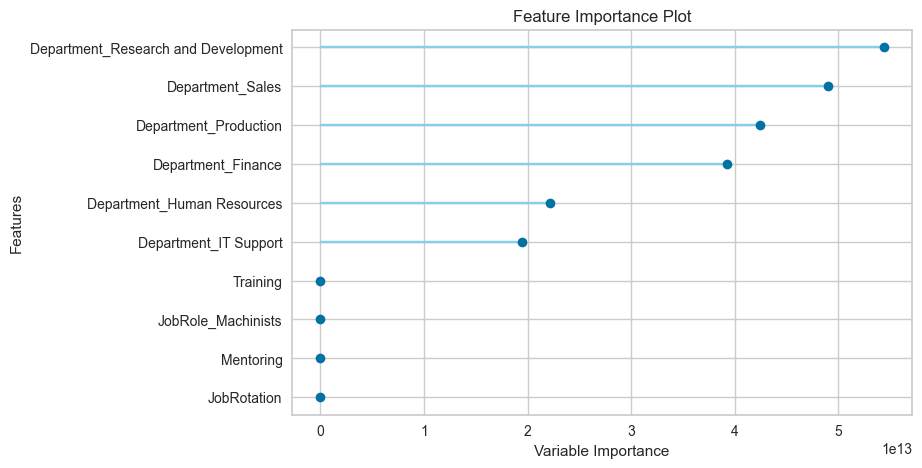

In [12]:
plot_model(tuned_model, plot="feature")

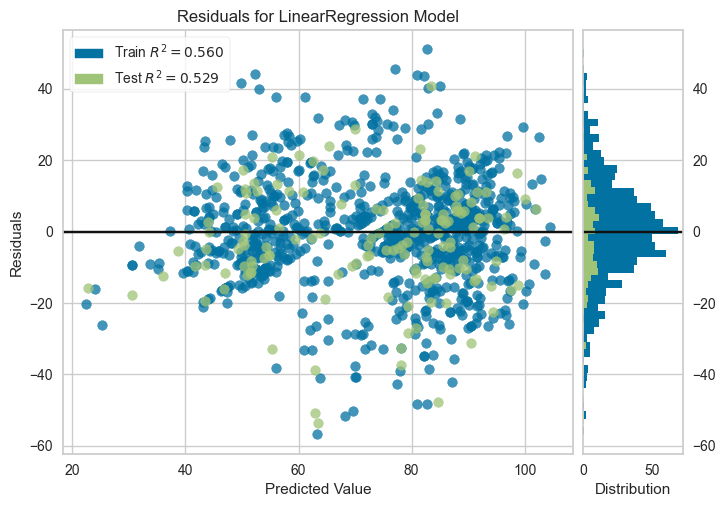

In [13]:
plot_model(tuned_model, plot='residuals')

In [14]:
m_lr = pull()

### Better Models

In [15]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.2173,70.7443,8.3402,0.7057,0.1901,0.1438,0.0410
gbr,Gradient Boosting Regressor,6.5257,73.9985,8.5698,0.6900,0.1968,0.1522,0.0250
et,Extra Trees Regressor,6.6534,82.3973,9.0520,0.6540,0.2030,0.1514,0.0530
lightgbm,Light Gradient Boosting Machine,6.8804,85.1684,9.1785,0.6439,0.2048,0.1567,0.1130
knn,K Neighbors Regressor,7.3155,91.3114,9.5037,0.6159,0.2151,0.1710,0.0160
ada,AdaBoost Regressor,8.3541,104.5443,10.2059,0.5582,0.2258,0.1870,0.0220
br,Bayesian Ridge,8.0294,114.7310,10.6565,0.5180,0.2334,0.1859,0.0160
lasso,Lasso Regression,8.0012,115.4073,10.6828,0.5168,0.2335,0.1863,0.0160
llar,Lasso Least Angle Regression,8.0012,115.4070,10.6827,0.5168,0.2335,0.1863,0.0150
ridge,Ridge Regression,8.0884,115.6656,10.6975,0.5139,0.2341,0.1866,0.0160


In [16]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0916,63.6301,7.9768,0.7340,0.1899,0.1439
1,7.4065,81.4598,9.0255,0.6457,0.1945,0.1649
2,7.8629,113.2960,10.6441,0.5501,0.2017,0.1568
3,6.0627,62.3430,7.8958,0.6872,0.1639,0.1345
4,5.2817,57.1060,7.5569,0.7359,0.1645,0.1157
5,6.0998,67.9659,8.2441,0.7342,0.2349,0.1747
6,6.2099,65.5144,8.0941,0.6761,0.1594,0.1217
7,6.5156,68.9505,8.3036,0.7381,0.1913,0.1561
8,6.5727,77.9750,8.8303,0.6963,0.2048,0.1559


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
final_model = finalize_model(tuned_model)

In [18]:
m_best = pull()

### Stacking Top 3 Models

In [19]:
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.2173,70.7443,8.3402,0.7057,0.1901,0.1438,0.0560
gbr,Gradient Boosting Regressor,6.5257,73.9985,8.5698,0.6900,0.1968,0.1522,0.0270
et,Extra Trees Regressor,6.6534,82.3973,9.0520,0.6540,0.2030,0.1514,0.0370
lightgbm,Light Gradient Boosting Machine,6.8804,85.1684,9.1785,0.6439,0.2048,0.1567,0.1210
knn,K Neighbors Regressor,7.3155,91.3114,9.5037,0.6159,0.2151,0.1710,0.0160
ada,AdaBoost Regressor,8.3541,104.5443,10.2059,0.5582,0.2258,0.1870,0.0230
br,Bayesian Ridge,8.0294,114.7310,10.6565,0.5180,0.2334,0.1859,0.0160
lasso,Lasso Regression,8.0012,115.4073,10.6828,0.5168,0.2335,0.1863,0.0170
llar,Lasso Least Angle Regression,8.0012,115.4070,10.6827,0.5168,0.2335,0.1863,0.0170
ridge,Ridge Regression,8.0884,115.6656,10.6975,0.5139,0.2341,0.1866,0.0160


In [20]:
stacked_model = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.1972,62.8287,7.9265,0.7374,0.1878,0.1445
1,6.6884,66.1223,8.1316,0.7124,0.1749,0.1463
2,7.3374,97.8118,9.8900,0.6116,0.1904,0.1474
3,5.6410,55.8939,7.4762,0.7195,0.1521,0.1219
4,5.0200,51.3297,7.1645,0.7627,0.1634,0.1146
5,5.8691,64.4077,8.0254,0.7481,0.2331,0.1706
6,5.9670,60.0323,7.7481,0.7032,0.1486,0.1151
7,5.7552,53.3686,7.3054,0.7973,0.1692,0.1341
8,6.2429,70.7250,8.4098,0.7245,0.1998,0.1490


In [21]:
best_tuned = tune_model(stacked_model, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.1972,62.8287,7.9265,0.7374,0.1878,0.1445
1,6.6884,66.1223,8.1316,0.7124,0.1749,0.1463
2,7.3374,97.8118,9.8900,0.6116,0.1904,0.1474
3,5.6410,55.8939,7.4762,0.7195,0.1521,0.1219
4,5.0200,51.3297,7.1645,0.7627,0.1634,0.1146
5,5.8691,64.4077,8.0254,0.7481,0.2331,0.1706
6,5.9670,60.0323,7.7481,0.7032,0.1486,0.1151
7,5.7552,53.3686,7.3054,0.7973,0.1692,0.1341
8,6.2429,70.7250,8.4098,0.7245,0.1998,0.1490


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
final_stacked_model = finalize_model(best_tuned)

--- Feature Importance for: Random Forest Regressor ---


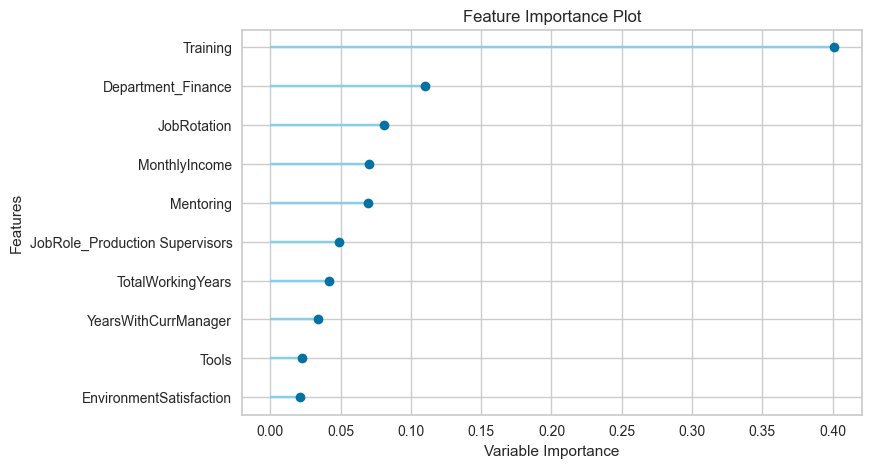

--- Feature Importance for: Gradient Boosting Regressor ---


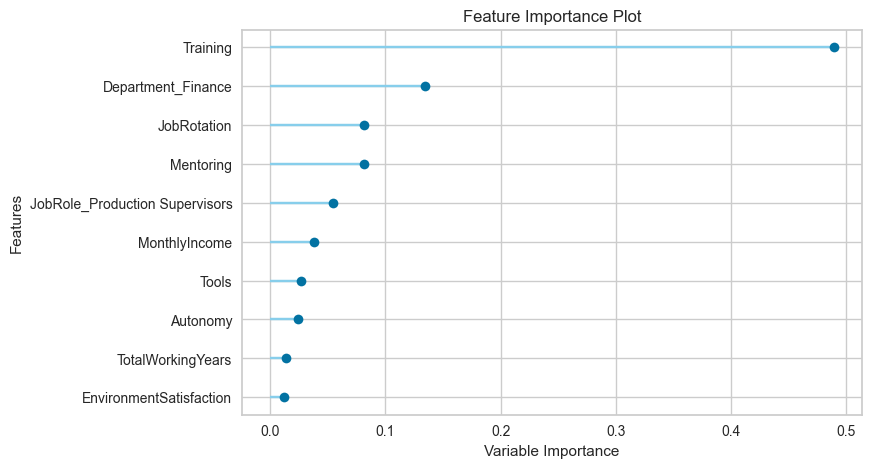

--- Feature Importance for: Extra Trees Regressor ---


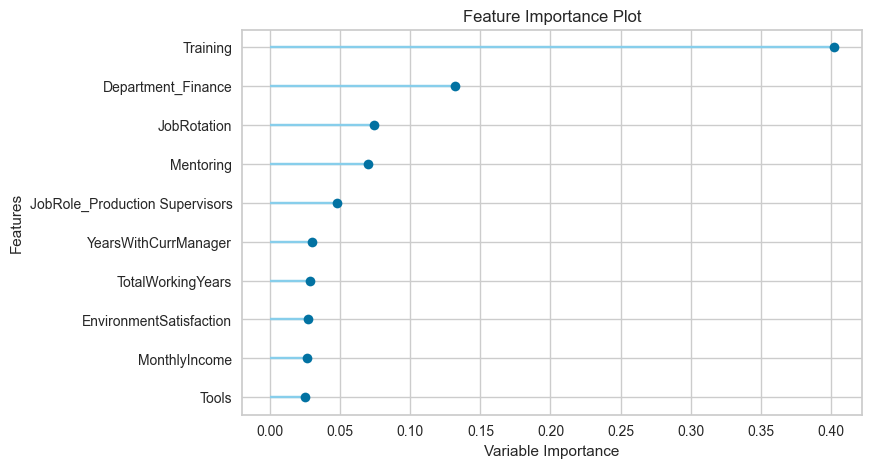

In [23]:
base_estimators = best_tuned.estimators_
estimator_names = [name for name, model in best_tuned.estimators]

for i, model in enumerate(base_estimators):
    print(f"--- Feature Importance for: {estimator_names[i]} ---")
    plot_model(model, plot='feature')

In [24]:
m_stack = pull()

## Compare Approaches

In [25]:
def keep_cols(df):
    return df[['R2','RMSE','MAE']].iloc[[0]]

tbl = pd.concat(
    [
        keep_cols(m_lr).assign(Model='LinearRegression'),
        keep_cols(m_best).assign(Model='BestSingle'),
        keep_cols(m_stack).assign(Model='Stacked')
    ],
    axis=0
).set_index('Model')

In [26]:
tbl

,R2,RMSE,MAE
Model,,,
LinearRegression,0.6679,8.9134,6.7134
BestSingle,0.7340,7.9768,6.0916
Stacked,0.7374,7.9265,6.1972


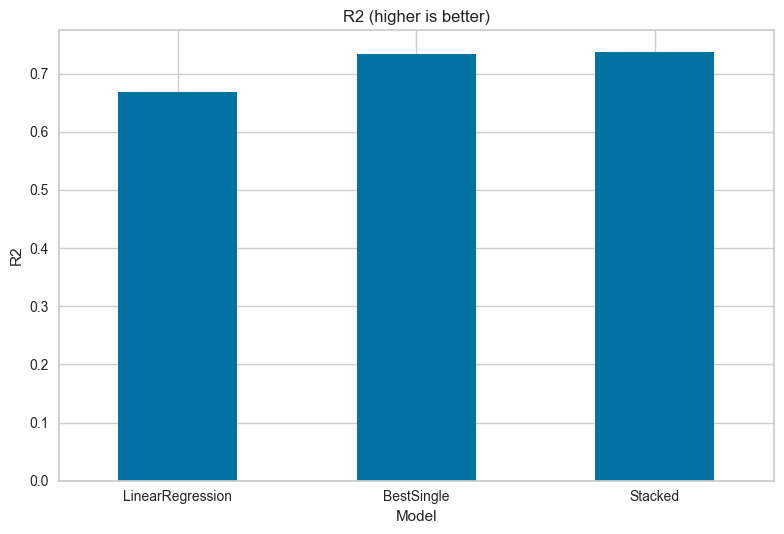

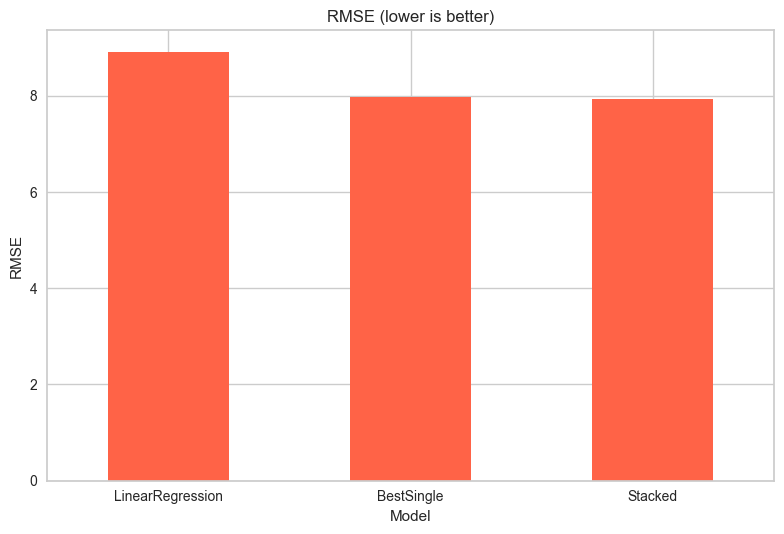

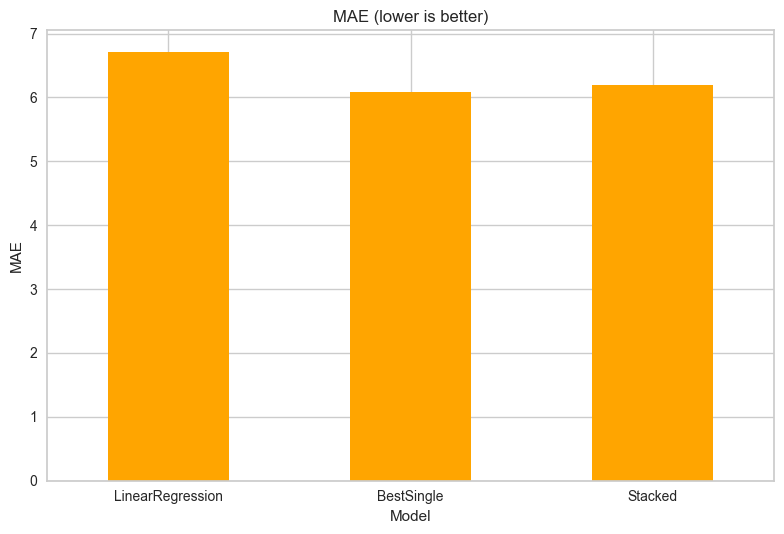

In [27]:
ax = tbl[['R2']].plot(kind='bar', legend=False, title='R2 (higher is better)')
plt.ylabel('R2'); plt.xticks(rotation=0); plt.tight_layout(); plt.show()

ax = tbl[['RMSE']].plot(kind='bar', legend=False, color='tomato', title='RMSE (lower is better)')
plt.ylabel('RMSE'); plt.xticks(rotation=0); plt.tight_layout(); plt.show()

ax = tbl[['MAE']].plot(kind='bar', legend=False, color='orange', title='MAE (lower is better)')
plt.ylabel('MAE'); plt.xticks(rotation=0); plt.tight_layout(); plt.show()

## Testing Best model

In [28]:
holdout_preds = predict_model(final_stacked_model, data=unseen_raw)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,6.5265,67.9052,8.2405,0.7342,0.1832,0.1448


In [29]:
holdout_preds.head()

,Department,EnvironmentSatisfaction,JobLevel,JobRotation,FeedbackFromManager,Mentoring,Autonomy,JobRole,MonthlyIncome,OverTime,Tools,TotalWorkingYears,Training,YearsWithCurrManager,Performance,prediction_label
626,Sales,2.0,2,2,L,Y,L,Sales Executive,5677.0,No,L,15.0,Y,10.0,78,54.504350
220,Production,1.0,3,3,H,Y,H,IT specialists,8760.0,Yes,L,6.0,Y,4.0,75,69.687926
678,Production,4.0,2,1,L,N,H,Machinists,4193.0,Yes,L,10.0,N,8.0,40,38.408249
930,Production,1.0,1,1,L,N,L,Production Supervisors,5838.0,No,H,9.0,N,2.0,37,31.976035
174,Sales,2.0,1,2,L,Y,L,Sales Representative,1359.0,No,L,1.0,N,0.0,36,44.490667


## Chosen Model Metric Viz

In [30]:
chosen = final_stacked_model

In [31]:
pred_holdout = predict_model(chosen)
y_true = pred_holdout['Performance']
y_pred = pred_holdout['prediction_label']
residuals = y_true - y_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.8016,14.7010,3.8342,0.9328,0.0783,0.0562


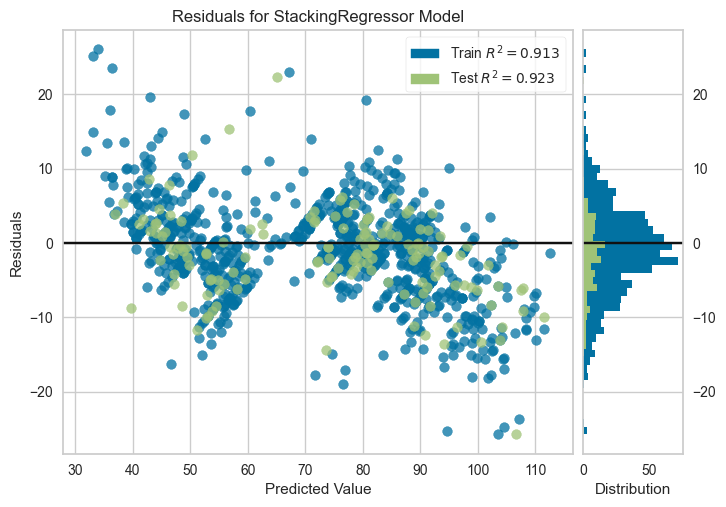

In [32]:
plot_model(chosen, plot='residuals')

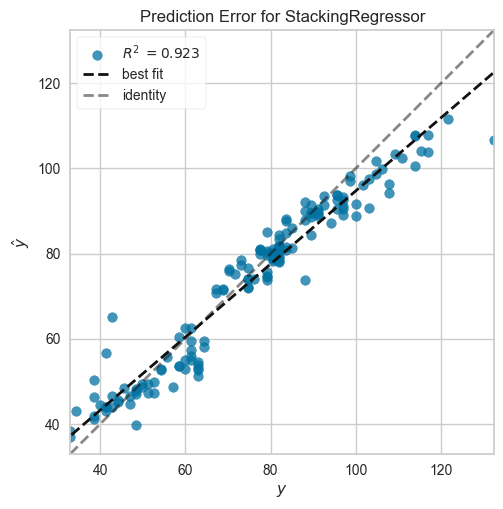

In [33]:
plot_model(chosen, plot='error')

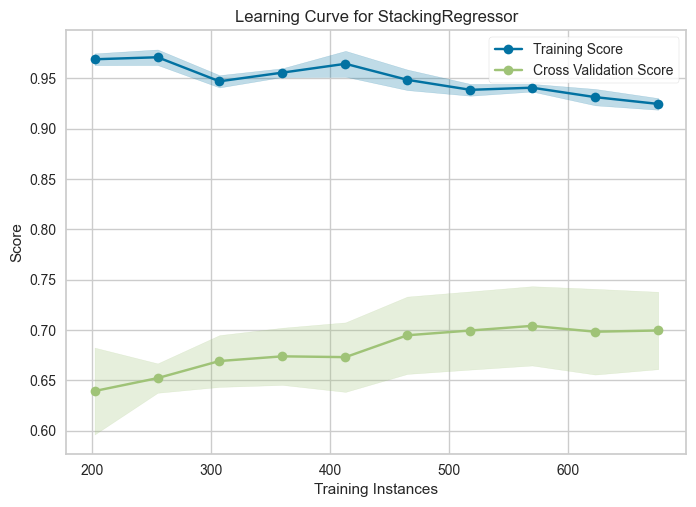

In [34]:
plot_model(chosen, plot='learning')

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

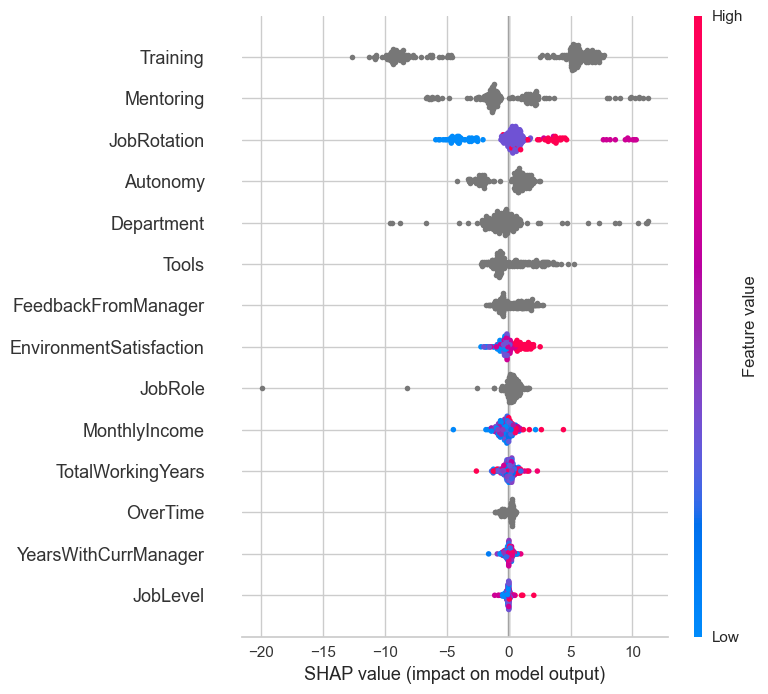

In [37]:
import shap, pandas as pd
final_model = finalize_model(chosen)
X_raw = df_train.drop(columns=['Performance'])
bg = shap.sample(X_raw, 200, random_state=42)
f = lambda X: final_model.predict(pd.DataFrame(X, columns=X_raw.columns))
explainer = shap.KernelExplainer(f, bg)
X_eval = shap.sample(X_raw, 200, random_state=123)
shap_values = explainer.shap_values(X_eval)
shap.summary_plot(shap_values, X_eval, feature_names=X_raw.columns)

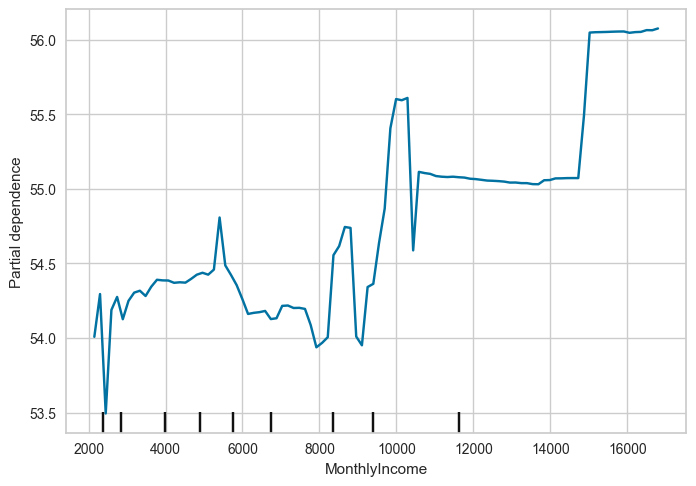

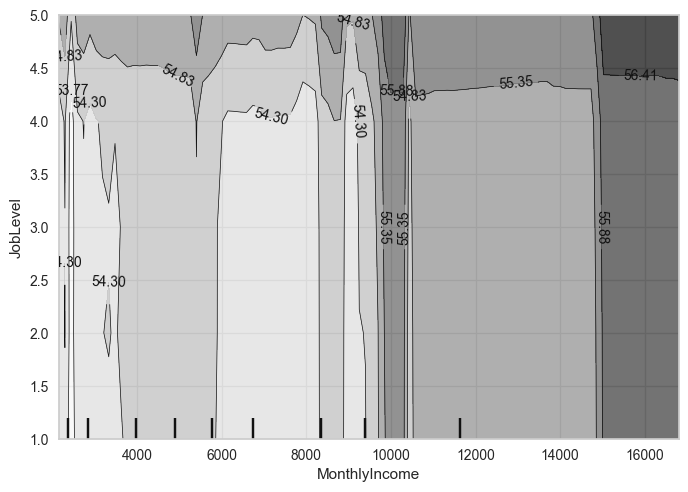

In [39]:
from sklearn.inspection import PartialDependenceDisplay
final_model = finalize_model(chosen)
X_raw = df_train.drop(columns=['Performance'])
PartialDependenceDisplay.from_estimator(final_model, X_raw, features=['MonthlyIncome'])
PartialDependenceDisplay.from_estimator(final_model, X_raw, features=[('MonthlyIncome','JobLevel')])  # 2-way

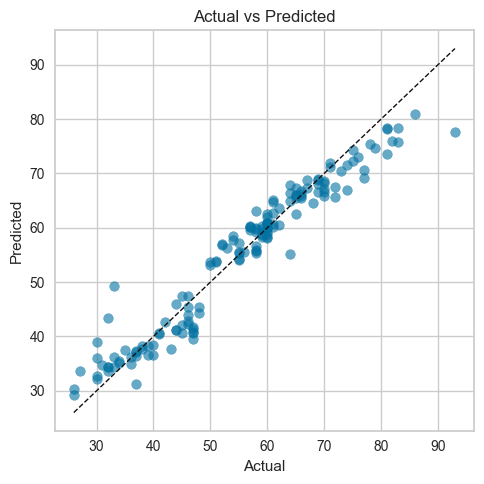

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, alpha=0.6)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'k--', linewidth=1)
plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Actual vs Predicted')
plt.tight_layout(); plt.show()

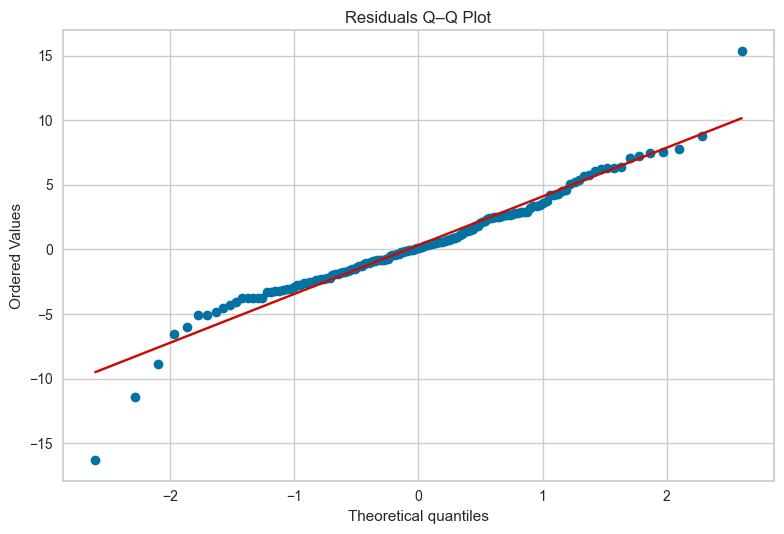

In [43]:
plt.figure()
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Residuals Q–Q Plot')
plt.tight_layout(); plt.show()

In [45]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X_bp = sm.add_constant(y_pred)
bp_stat, bp_p, _, _ = het_breuschpagan(residuals, X_bp)
print({'breusch_pagan_pvalue': bp_p})

{'breusch_pagan_pvalue': 0.7600196257856084}
